In [1]:
#on importe le dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, y = mnist["data"], mnist["target"]

In [14]:
import numpy as np
print(X.shape)
print(y.shape)
y = y.astype(np.uint8)
type(y[0])

(70000, 784)
(70000,)


numpy.uint8

In [15]:
#on divise les divises le data set en train et test
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(kn_clf, X_train, y_train, cv=3)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]],
      dtype=int64)

In [21]:
y_train_perfect_predictions = y_train # on pretend qu'on a atteint la perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]],
      dtype=int64)

In [38]:
from sklearn.metrics import precision_score, recall_score
#precision = recall en micro (logique)
print(precision_score(y_train, y_train_pred,average="macro"))
print(recall_score(y_train, y_train_pred,average="macro"))

0.967895609653832
0.9669341316176434


In [61]:
plist=[]
for k in range(1,11):
    kn_clf_graph=KNeighborsClassifier(n_neighbors=k)
    y_train_pred_graph=cross_val_predict(kn_clf_graph, X_train, y_train, cv=3)
    plist.append(precision_score(y_train, y_train_pred_graph,average="macro"))
    print("t")


t
t
t
t
t
t
t
t
t
t


[0.9676185119408102, 0.9612447425631856, 0.9685777168572965, 0.9671131328042801, 0.967895609653832, 0.9660812852681175, 0.9657804127779395, 0.9650289196583831, 0.9645292847825852, 0.9637025030902342]


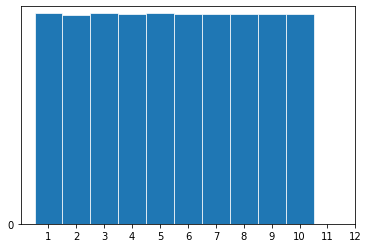

In [68]:
print(plist)
fig, ax = plt.subplots()

ax.bar(range(1,11),plist, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 10), xticks=np.arange(1, 13),
       ylim=(0, 1), yticks=np.arange(0, 1))

plt.show()

In [69]:
plist2=[]
for k in range(1,11):
    kn_clf_graph2=KNeighborsClassifier(n_neighbors=k,weights="distance")
    y_train_pred_graph2=cross_val_predict(kn_clf_graph2, X_train, y_train, cv=3)
    plist2.append(precision_score(y_train, y_train_pred_graph2,average="macro"))
    print(plist2)

[0.9676185119408102]
[0.9676185119408102, 0.9676185119408102]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197, 0.9699407539639289]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197, 0.9699407539639289, 0.9671942462466465]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197, 0.9699407539639289, 0.9671942462466465, 0.9678146843325326]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197, 0.9699407539639289, 0.9671942462466465, 0.9678146843325326, 0.9657092739450454]
[0.9676185119408102, 0.9676185119408102, 0.969645263039643, 0.9706461096541235, 0.969050240934197, 0.96

In [70]:
#on remarque un max au niveau de la précision quand k = 4 et que le weights = distance
#on regarde alors la précision pour le y_test avec k = 4 et weights=distance

kn_clf_final=KNeighborsClassifier(n_neighbors=4,weights="distance")
kn_clf_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [71]:
#on fait les prédisctions
y_pred=kn_clf_final.predict(X_test)

In [72]:
#on regarde la précision
precision_score(y_train, y_pred,average="macro")

ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]